In [1]:
import os
os.chdir('../py')

import gc

import pandas as pd
import numpy as np
import feather

from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold
from sklearn.preprocessing import LabelEncoder

# my modules
import EDA
import utils

from scipy.stats import ks_2samp

import datetime

import super_aggre

In [2]:
train = feather.read_dataframe('../input/feather/train.ftr')
test = feather.read_dataframe('../input/feather/test.ftr')

In [3]:
train['DeviceInfo']

0                                       None
1                                       None
2                                       None
3                                       None
4              SAMSUNG SM-G892A Build/NRD90M
5                                       None
6                                       None
7                                       None
8                                 iOS Device
9                                       None
10                                   Windows
11                                      None
12                                      None
13                                      None
14                                      None
15                                      None
16                                     MacOS
17                                   Windows
18                                      None
19                                      None
20                                      None
21                                      None
22        

In [6]:
train['DeviceType']

0            None
1            None
2            None
3            None
4          mobile
5            None
6            None
7            None
8          mobile
9            None
10        desktop
11        desktop
12           None
13           None
14           None
15           None
16        desktop
17        desktop
18           None
19           None
20           None
21           None
22           None
23           None
24           None
25           None
26           None
27           None
28           None
29           None
           ...   
590510       None
590511       None
590512       None
590513       None
590514       None
590515       None
590516       None
590517       None
590518       None
590519       None
590520       None
590521     mobile
590522       None
590523       None
590524       None
590525       None
590526     mobile
590527       None
590528       None
590529     mobile
590530       None
590531    desktop
590532       None
590533       None
590534    

In [49]:
train['id_30'].unique()

array([None, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6',
       'Windows 10', 'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 1

In [55]:
train['id_30'].astype(str).map(lambda x: x.split(' ')[0]).unique()

array(['None', 'Android', 'iOS', 'Mac', 'Windows', 'Linux', 'func',
       'other'], dtype=object)

In [56]:
train['id_30'].astype(str).map(lambda x: x.split(' ')[-1]).unique()

array(['None', '7.0', '11.1.2', '10_11_6', '10', 'Android', 'Linux',
       '11.0.3', '10_7_5', '10_12_6', '10_13_1', '11.1.0', '10_9_5', '7',
       '8.1', 'Mac', '10.3.3', '10.12', '10_10_5', '10_11_5', '9.3.5',
       '5.1.1', '7.1.1', '6.0', '10.3.1', '10.9', '11.1.1', 'Vista',
       '10.3.2', '11.0.2', '10.11', '8.0.0', '10.2.0', '10.2.1', '11.0.0',
       '10.10', '10_12_3', '10_12', '6.0.1', 'iOS', '10.13', '10_12_5',
       '10_8_5', '11.0.1', '10.0.2', '5.0.2', 'XP', '11.2.0', '10.6', '8',
       '10_6_8', '10_11_4', '10_12_1', '10.1.1', '10_11_3', '10_12_4',
       '10_13_2', '4.4.2', '10_12_2', '5.0', 'func', '7.1.2', '8.1.0',
       'other', '10_13_3', '11.2.1', '11.2.5', 'Windows', '11.2.2',
       '11.3.0', '11.2.6', '10_13_4', '10_13_5', '11.4.0', '11.3.1',
       '11.4.1'], dtype=object)

In [57]:
train[train['id_30'] == 'func']

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
18582,3005582,0,498070,50.0,H,9803,583.0,150.0,visa,226.0,...,chrome 62.0,24.0,1920x1080,match_status:1,T,F,T,T,desktop,Windows
27039,3014039,0,682913,100.0,H,10616,583.0,150.0,visa,226.0,...,chrome 62.0 for ios,32.0,2048x1536,match_status:2,T,F,T,T,mobile,None
33494,3020494,0,839618,50.0,H,2755,404.0,150.0,mastercard,102.0,...,chrome 62.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,None
80526,3067526,0,1730126,40.0,H,3682,264.0,150.0,visa,162.0,...,ie 11.0 for desktop,24.0,1366x768,match_status:2,T,T,T,T,desktop,Trident/7.0
84358,3071358,0,1797728,75.0,H,16659,170.0,150.0,visa,226.0,...,safari generic,24.0,2560x1600,match_status:2,T,T,F,T,desktop,None
108441,3095441,0,2143505,30.0,H,15497,490.0,150.0,visa,226.0,...,chrome 63.0,24.0,1600x900,match_status:2,T,F,T,T,desktop,Windows
109862,3096862,0,2154196,25.0,H,17188,321.0,150.0,visa,226.0,...,chrome 63.0 for android,32.0,1280x720,match_status:2,T,F,T,T,mobile,LG-TP260 Build/NRD90U
113251,3100251,0,2213077,20.0,H,2884,490.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,2436x1125,match_status:1,T,F,F,T,mobile,None
114609,3101609,0,2225655,40.0,H,10838,143.0,150.0,visa,226.0,...,edge 15.0,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows
132961,3119961,0,2658012,100.0,H,12695,490.0,150.0,visa,226.0,...,chrome 58.0,24.0,1280x1024,match_status:2,T,F,T,T,desktop,None


In [58]:
train[train['id_30'] == 'other']

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
33565,3020565,0,840329,50.0,H,10486,514.0,150.0,mastercard,219.0,...,Nokia/Lumia,24.0,None,match_status:2,T,F,T,T,mobile,Trident/7.0
92065,3079065,0,1903890,40.0,H,3278,453.0,150.0,visa,226.0,...,edge 16.0,24.0,3840x2160,match_status:2,T,F,T,T,desktop,Windows
99878,3086878,0,2003532,50.0,H,15497,490.0,150.0,visa,226.0,...,mobile safari 11.0,32.0,2208x1242,match_status:1,T,F,T,T,mobile,None
117262,3104262,0,2292672,150.0,H,6481,111.0,150.0,visa,226.0,...,mobile safari 10.0,32.0,1136x640,match_status:1,T,F,F,T,mobile,None
178203,3165203,0,3882218,30.0,H,8483,360.0,150.0,mastercard,166.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,T,T,mobile,None
293190,3280190,1,7240464,150.0,H,14479,387.0,150.0,visa,226.0,...,chrome generic,24.0,1280x800,match_status:2,T,F,T,T,desktop,Windows
293198,3280198,1,7240711,150.0,H,14479,387.0,150.0,visa,226.0,...,chrome generic,24.0,1280x800,match_status:2,T,F,T,T,desktop,Windows
293211,3280211,1,7240858,150.0,H,14479,387.0,150.0,visa,226.0,...,chrome generic,24.0,1280x800,match_status:2,T,F,T,T,desktop,Windows
332596,3319596,0,8190930,100.0,H,15757,322.0,150.0,visa,195.0,...,mobile safari generic,32.0,2436x1125,match_status:1,T,F,F,T,mobile,None
503527,3490527,1,13195266,100.0,R,9803,583.0,150.0,visa,226.0,...,opera,24.0,1280x720,match_status:0,T,F,T,F,desktop,Windows


In [59]:
train[train['id_30'].isnull()]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.500000,W,13926,NaN,150.0,discover,142.0,...,None,NaN,None,None,None,None,None,None,None,None
1,2987001,0,86401,29.000000,W,2755,404.0,150.0,mastercard,102.0,...,None,NaN,None,None,None,None,None,None,None,None
2,2987002,0,86469,59.000000,W,4663,490.0,150.0,visa,166.0,...,None,NaN,None,None,None,None,None,None,None,None
3,2987003,0,86499,50.000000,W,18132,567.0,150.0,mastercard,117.0,...,None,NaN,None,None,None,None,None,None,None,None
5,2987005,0,86510,49.000000,W,5937,555.0,150.0,visa,226.0,...,None,NaN,None,None,None,None,None,None,None,None
6,2987006,0,86522,159.000000,W,12308,360.0,150.0,visa,166.0,...,None,NaN,None,None,None,None,None,None,None,None
7,2987007,0,86529,422.500000,W,12695,490.0,150.0,visa,226.0,...,None,NaN,None,None,None,None,None,None,None,None
9,2987009,0,86536,117.000000,W,17399,111.0,150.0,mastercard,224.0,...,None,NaN,None,None,None,None,None,None,None,None
10,2987010,0,86549,75.887001,C,16496,352.0,117.0,mastercard,134.0,...,chrome 62.0,NaN,None,None,F,F,T,T,desktop,Windows
11,2987011,0,86555,16.495001,C,4461,375.0,185.0,mastercard,224.0,...,chrome 62.0,NaN,None,None,F,F,T,T,desktop,None


In [189]:
remove_features = pd.read_pickle('../input/pickle/remove_features.pkl')
remove_features = list(remove_features['features_to_remove'].values)


In [193]:
remove_features = [col for col in remove_features if not 'uid' in col] #############

['TransactionID',
 'TransactionDT',
 'isFraud',
 'DT',
 'DT_M',
 'DT_W',
 'DT_D',
 'DT_hour',
 'DT_day_week',
 'DT_day_month',
 'DT_M_total',
 'DT_W_total',
 'DT_D_total',
 'bank_type']

In [188]:
remove_features

[]

In [186]:
pd.read_pickle('../input/pickle/remove_features.pkl')

,features_to_remove
0,TransactionID
1,TransactionDT
2,isFraud
3,DT
4,DT_M
5,DT_W
6,DT_D
7,DT_hour
8,DT_day_week
9,DT_day_month


In [7]:
train['DeviceInfo'].nunique()

1786

In [30]:
tmp = train['DeviceInfo'].fillna('NA').map(lambda x: x.split(' ')[0])

In [44]:
print(train['DeviceInfo'].unique().tolist())

[None, 'SAMSUNG SM-G892A Build/NRD90M', 'iOS Device', 'Windows', 'MacOS', 'SM-G930V Build/NRD90M', 'BLADE A602 Build/MRA58K', 'XT1635-02 Build/NPN26.118-22-2', 'Z970', 'SM-N920V Build/NRD90M', 'Redmi Note 4 Build/MMB29M', 'Lenovo PB1-750M Build/S100', 'LT22i Build/6.2.A.1.100', 'rv:52.0', 'SM-G950U Build/NRD90M', 'LG-H872 Build/NRD90U', 'LG-K500 Build/MMB29M', 'SM-P550 Build/MMB29M', 'SM-J700M Build/MMB29K', 'Trident/7.0', 'rv:57.0', 'SAMSUNG SM-G930T Build/NRD90M', 'Blade V6 Plus Build/MRA58K', 'BLL-L23 Build/HUAWEIBLL-L23', 'KYOCERA-C6742A Build/LMY47V', 'F3113 Build/33.2.A.4.70', 'D5306 Build/19.4.A.0.182', 'M4 SS4457 Build/MRA58K', 'SM-G955U Build/NRD90M', 'SM-G610M Build/MMB29K', 'SAMSUNG SM-G935F Build/NRD90M', 'XT1635-01', 'rv:56.0', 'VS500', 'CAM-L03 Build/HUAWEICAM-L03', 'RCT6303W87M7 Build/MRA58K', 'M4 SS4451 Build/LMY47D', 'KFFOWI Build/LVY48F', 'Moto E (4) Build/NMA26.42-19', 'SAMSUNG', 'E2306 Build/26.3.A.1.33', 'Ilium L910 Build/MRA58K', 'GT-I9300', 'LG-H420 Build/LRX21Y'

In [31]:
print(tmp.unique().tolist())

['NA', 'SAMSUNG', 'iOS', 'Windows', 'MacOS', 'SM-G930V', 'BLADE', 'XT1635-02', 'Z970', 'SM-N920V', 'Redmi', 'Lenovo', 'LT22i', 'rv:52.0', 'SM-G950U', 'LG-H872', 'LG-K500', 'SM-P550', 'SM-J700M', 'Trident/7.0', 'rv:57.0', 'Blade', 'BLL-L23', 'KYOCERA-C6742A', 'F3113', 'D5306', 'M4', 'SM-G955U', 'SM-G610M', 'XT1635-01', 'rv:56.0', 'VS500', 'CAM-L03', 'RCT6303W87M7', 'KFFOWI', 'Moto', 'E2306', 'Ilium', 'GT-I9300', 'LG-H420', 'XT1032', 'GT-I9060M', 'rv:38.0', 'SM-G530T', 'LGMP260', 'SM-E500M', 'rv:11.0', 'SM-G920I', 'SM-G900H', 'TRT-L53', 'Android', 'Nexus', 'SGP521', 'VS988', 'SM-G531H', 'LG-K410', 'SM-G935F', 'LG-X180g', 'SM-G925P', 'es-us', 'SM-G920V', 'SM-G935T', 'SM-G925W8', 'rv:48.0', 'SAMSUNG-SM-G930A', 'HTC', '7055A', 'SM-T810', 'rv:51.0', 'SM-N910V', 'SM-G930T', 'LG-H870', 'SM-N920G', 'LG-D373', 'ALE-L23', 'Z836BL', 'LG-D680', 'LG-K580', 'SM-A710M', 'Z981', 'SM-T710', 'SM-T700', 'ONE', 'F5121', 'WAS-LX3', 'R8106', 'MotoG3', 'SM-G925I', 'HUAWEI', 'SM-T113NU', 'SM-J510MN', 'SM-G950F

In [45]:
EDA.max_disp(train[train['DeviceInfo'].astype(str).str.contains('7_Plus')])

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
559860,3546860,0,14835375,14.755,C,15885,545.0,185.0,visa,138.0,debit,NaN,NaN,NaN,96.0,hotmail.com,hotmail.com,1.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,0.0,NaN,1.0,0.0,NaN,1.0,None,None,None,M2,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,14.7552,14.7552,0.0,14.7552,0.0,14.7552,14.7552,14.7552,14.7552,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,267608.0,NaN,NaN,-2.0,-29.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,13.0,266.0,563.0,NaN,NaN,None,NaN,NaN,NaN,None,New,NotFound,None,android webview 4.0,NaN,None,None,F,F,T,F,mobile,7_Plus


In [32]:
tmp.map(lambda x: x.split('-')[0]).nunique()

662

In [33]:
print(tmp.map(lambda x: x.split('-')[0]).unique().tolist())

['NA', 'SAMSUNG', 'iOS', 'Windows', 'MacOS', 'SM', 'BLADE', 'XT1635', 'Z970', 'Redmi', 'Lenovo', 'LT22i', 'rv:52.0', 'LG', 'Trident/7.0', 'rv:57.0', 'Blade', 'BLL', 'KYOCERA', 'F3113', 'D5306', 'M4', 'rv:56.0', 'VS500', 'CAM', 'RCT6303W87M7', 'KFFOWI', 'Moto', 'E2306', 'Ilium', 'GT', 'XT1032', 'rv:38.0', 'LGMP260', 'rv:11.0', 'TRT', 'Android', 'Nexus', 'SGP521', 'VS988', 'es', 'rv:48.0', 'HTC', '7055A', 'rv:51.0', 'ALE', 'Z836BL', 'Z981', 'ONE', 'F5121', 'WAS', 'R8106', 'MotoG3', 'HUAWEI', 'LGLS676', 'TA', 'VK810', 'KFASWI', '5012G', '5080A', 'XT1254', 'KFGIWI', 'Pixel', 'E5606', 'Z410', 'P4526A', 'XT1565', 'F3213', 'REX', 'XT1585', 'KFAUWI', 'Edison', 'Hisense', 'LGLS775', 'QTASUN1', 'rv:58.0', 'XT1063', 'VS995', 'BAC', 'VS835', 'KFDOWI', 'CHC', 'Aquaris', 'Alcatel_4060A', 'LGMS631', 'MOT', '5011A', 'E6603', 'rv:55.0', 'KFSAWI', 'rv:45.0', 'MDDRJS', 'Y635', 'rv:42.0', 'BNTV400', 'ONEPLUS', 'XT1710', 'rv:49.0', 'EVA', 'FRD', 'Linux', 'Z983', 'LGLS991', 'Le', 'XT1650', 'QTAQZ3', 'F5321'

In [34]:
tmp2 = tmp.map(lambda x: x.split('-')[0])

In [35]:
print(tmp2.map(lambda x: x.split('_')[0]).unique().tolist())

['NA', 'SAMSUNG', 'iOS', 'Windows', 'MacOS', 'SM', 'BLADE', 'XT1635', 'Z970', 'Redmi', 'Lenovo', 'LT22i', 'rv:52.0', 'LG', 'Trident/7.0', 'rv:57.0', 'Blade', 'BLL', 'KYOCERA', 'F3113', 'D5306', 'M4', 'rv:56.0', 'VS500', 'CAM', 'RCT6303W87M7', 'KFFOWI', 'Moto', 'E2306', 'Ilium', 'GT', 'XT1032', 'rv:38.0', 'LGMP260', 'rv:11.0', 'TRT', 'Android', 'Nexus', 'SGP521', 'VS988', 'es', 'rv:48.0', 'HTC', '7055A', 'rv:51.0', 'ALE', 'Z836BL', 'Z981', 'ONE', 'F5121', 'WAS', 'R8106', 'MotoG3', 'HUAWEI', 'LGLS676', 'TA', 'VK810', 'KFASWI', '5012G', '5080A', 'XT1254', 'KFGIWI', 'Pixel', 'E5606', 'Z410', 'P4526A', 'XT1565', 'F3213', 'REX', 'XT1585', 'KFAUWI', 'Edison', 'Hisense', 'LGLS775', 'QTASUN1', 'rv:58.0', 'XT1063', 'VS995', 'BAC', 'VS835', 'KFDOWI', 'CHC', 'Aquaris', 'Alcatel', 'LGMS631', 'MOT', '5011A', 'E6603', 'rv:55.0', 'KFSAWI', 'rv:45.0', 'MDDRJS', 'Y635', 'rv:42.0', 'BNTV400', 'ONEPLUS', 'XT1710', 'rv:49.0', 'EVA', 'FRD', 'Linux', 'Z983', 'LGLS991', 'Le', 'XT1650', 'QTAQZ3', 'F5321', 'KFT

In [36]:
tmp3 = tmp2.map(lambda x: x.split('_')[0])

In [38]:
print(tmp3.map(lambda x: x.split(':')[0]).unique().tolist())

['NA', 'SAMSUNG', 'iOS', 'Windows', 'MacOS', 'SM', 'BLADE', 'XT1635', 'Z970', 'Redmi', 'Lenovo', 'LT22i', 'rv', 'LG', 'Trident/7.0', 'Blade', 'BLL', 'KYOCERA', 'F3113', 'D5306', 'M4', 'VS500', 'CAM', 'RCT6303W87M7', 'KFFOWI', 'Moto', 'E2306', 'Ilium', 'GT', 'XT1032', 'LGMP260', 'TRT', 'Android', 'Nexus', 'SGP521', 'VS988', 'es', 'HTC', '7055A', 'ALE', 'Z836BL', 'Z981', 'ONE', 'F5121', 'WAS', 'R8106', 'MotoG3', 'HUAWEI', 'LGLS676', 'TA', 'VK810', 'KFASWI', '5012G', '5080A', 'XT1254', 'KFGIWI', 'Pixel', 'E5606', 'Z410', 'P4526A', 'XT1565', 'F3213', 'REX', 'XT1585', 'KFAUWI', 'Edison', 'Hisense', 'LGLS775', 'QTASUN1', 'XT1063', 'VS995', 'BAC', 'VS835', 'KFDOWI', 'CHC', 'Aquaris', 'Alcatel', 'LGMS631', 'MOT', '5011A', 'E6603', 'KFSAWI', 'MDDRJS', 'Y635', 'BNTV400', 'ONEPLUS', 'XT1710', 'EVA', 'FRD', 'Linux', 'Z983', 'LGLS991', 'Le', 'XT1650', 'QTAQZ3', 'F5321', 'KFTBWI', 'XT1064', 'VS987', 'NetHelper70', 'D5803', 'ZEIA8', 'VS501', 'MotoE2(4G', 'Touch', 'KFAPWI', 'G3313', 'AX920', 'QMV7A', 

In [61]:
imp = pd.read_csv('LOG/imp/csv/imp_925_from923_addf207.py.csv')

In [63]:
imp['feature'].unique()

array(['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4',
       'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2',
       'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1',
       'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
       'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35',
       'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44',
       'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53',
       'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
       'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73',

In [64]:
df = pd.read_pickle('../input/pickle/train_df.pkl')

In [70]:
np.where(df.dtypes == 'category')[0]

array([ 15,  16, 406, 407, 408, 409, 410, 420, 782])

In [73]:
train['addr1'].value_counts()

299.0    46335
325.0    42751
204.0    42020
264.0    39870
330.0    26287
315.0    23078
441.0    20827
272.0    20141
123.0    16105
126.0    15243
184.0    15160
337.0    15149
191.0    14979
181.0    13856
143.0     9806
476.0     9478
310.0     8486
472.0     8478
327.0     8425
512.0     8268
387.0     8187
433.0     7831
231.0     7605
485.0     6816
269.0     6404
205.0     5725
225.0     5323
251.0     5216
494.0     5065
220.0     5041
         ...  
190.0        1
493.0        1
279.0        1
195.0        1
196.0        1
338.0        1
200.0        1
335.0        1
333.0        1
489.0        1
331.0        1
457.0        1
206.0        1
329.0        1
211.0        1
213.0        1
328.0        1
458.0        1
326.0        1
323.0        1
217.0        1
219.0        1
318.0        1
316.0        1
223.0        1
462.0        1
128.0        1
481.0        1
120.0        1
340.0        1
Name: addr1, Length: 332, dtype: int64

In [72]:
train['C13'].value_counts()

1.0       199337
2.0        57616
0.0        35460
3.0        33033
4.0        23704
5.0        18355
6.0        15127
7.0        13001
8.0        11424
9.0        10189
10.0        9263
11.0        8591
12.0        8442
13.0        8032
14.0        6997
15.0        6254
16.0        5838
17.0        5398
18.0        4898
19.0        4503
20.0        4135
21.0        3865
22.0        3584
23.0        3429
24.0        3271
25.0        3056
26.0        2827
27.0        2692
28.0        2588
29.0        2556
           ...  
2917.0         1
2915.0         1
2914.0         1
2913.0         1
2905.0         1
2902.0         1
2892.0         1
2898.0         1
1681.0         1
2348.0         1
1764.0         1
1332.0         1
2244.0         1
1088.0         1
1536.0         1
1666.0         1
1772.0         1
1336.0         1
948.0          1
2360.0         1
1340.0         1
2364.0         1
1669.0         1
1108.0         1
1671.0         1
2912.0         1
1673.0         1
2344.0        

In [74]:
train['dist1'].value_counts()

0.0        19824
1.0        18330
2.0        17028
4.0        13067
3.0        12808
5.0        12004
6.0         9843
7.0         9340
8.0         7731
9.0         7728
10.0        6288
11.0        6047
12.0        5384
14.0        4603
13.0        4559
15.0        3451
16.0        3390
18.0        2818
17.0        2766
19.0        2429
21.0        2243
20.0        2097
22.0        1968
24.0        1738
23.0        1721
26.0        1491
25.0        1428
27.0        1201
28.0        1161
29.0        1010
           ...  
1962.0         1
1405.0         1
2583.0         1
2578.0         1
1399.0         1
1966.0         1
10286.0        1
2570.0         1
2569.0         1
2566.0         1
1968.0         1
2601.0         1
7136.0         1
2657.0         1
2600.0         1
1377.0         1
2649.0         1
2646.0         1
2638.0         1
2637.0         1
2630.0         1
2072.0         1
2607.0         1
1391.0         1
2623.0         1
2621.0         1
2618.0         1
2613.0        

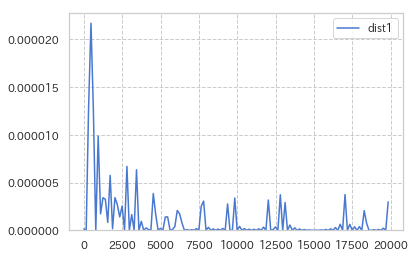

In [79]:
sns.kdeplot(train['dist1'].value_counts())

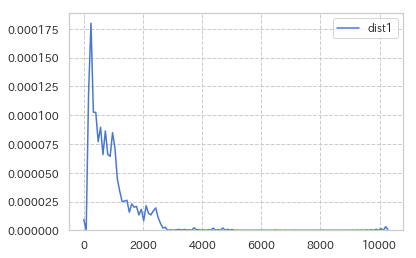

In [80]:
sns.kdeplot(train['dist1'])

In [81]:
import lightgbm as lgb

In [98]:
param = {
    'learning_rate': 0.04,
    'num_leaves': 3,
    'metric':'auc',
    'boost_from_average':'false',
    'feature_fraction': 1.0,
    'max_depth': -1,
    'objective': 'binary',
    'verbosity': -1}

In [85]:
counting = 'card1'

In [86]:
df = train[[counting] + ['isFraud']]

In [87]:
vc = df[counting].value_counts()

df['card1_count'] = df[counting].map(vc)

In [88]:
def ksplit(X_train, y_train):
    folds = KFold(n_splits=NFOLD, shuffle=True, random_state=SEED)
    trn_idx_list = []
    val_idx_list = []
    for trn_idx, val_idx in folds.split(X_train, y_train):
        trn_idx_list.append(trn_idx)
        val_idx_list.append(val_idx)

    return trn_idx_list, val_idx_list

In [92]:
NFOLD = 5
SEED  = 42
trn_idx_list, val_idx_list = ksplit(df[['card1', 'card1_count']], df['isFraud'])

In [101]:
from sklearn.metrics import roc_auc_score

In [ ]:
df2 = df.sample(frac=1, random_state=42)

df['pred'] = 0
oof_preds = np.zeros(len(df2))
test_preds = np.zeros(len(test))

X_train = df2[['card1', 'card1_count']]
y_train = df2['isFraud']
evals_result = {}

# MAKE A GRID OF POINTS FOR LGBM TO PREDICT    
mn, mx = plt.xlim()

mnFE = df2['card1_count'].min()
mxFE = df2['card1_count'].max()
step = 50
stepB = df2['card1_count'].nunique()

w = (mx - mn) / step
x = w * (np.arange(0, step) + 0.5) + mn
x2 = np.array([])

# PREDICTION
for i in range(NFOLD):
    trn_x, trn_y = X_train.loc[trn_idx_list[i]], y_train.loc[trn_idx_list[i]]
    val_x, val_y = X_train.loc[val_idx_list[i]], y_train.loc[val_idx_list[i]]
    
    dtrain = lgb.Dataset(trn_x, label=trn_y)
    dvalid = lgb.Dataset(val_x, label=val_y)
    
    model = lgb.train(
        param,
        dtrain,
        750,
        valid_sets=[dtrain, dvalid],
        verbose_eval=False,
        evals_result=evals_result
    )
    
    x = evals_result['valid_1']['auc']
    
    oof_preds[val_idx_list[i]] = model.predict(val_x, num_iteration=model.best_iteration)
#     test_preds += model.predict(test[['card1', 'card1_count']], num_iteration=model.best_iteration) / NFOLD
    df['pred'] += model.predict(df[['card1', 'card1_count']], num_iteration=model.best_iteration) / NFOLD
    
val_auc = roc_auc_score(df2['isFraud'], oof_preds)
print('card1 with magic val_auc =',round(val_auc,5))
# all_oof[:,j+1] = oof
# all_preds[:,j+1] = preds


In [105]:
x

array([0.03150344, 0.04073854, 0.03248486, ..., 0.03149543, 0.02802601,
       0.03843208])

In [106]:
len(x)

590540

In [110]:
stepB

517

In [112]:
mn

0.0

In [111]:
mx

1.0

In [126]:
from sklearn.model_selection import train_test_split

In [129]:
params = {'objective': 'binary', "boosting_type": "gbdt", "subsample": 1, "bagging_seed": 11, "metric": 'auc', 'random_state': 47}

In [178]:
X

,addr1,addr1_count
0,315.0,43035
1,325.0,76902
2,330.0,48387
3,476.0,17455
4,420.0,7107
5,272.0,35929
6,126.0,28198
7,325.0,76902
8,337.0,28081
9,204.0,77069


ROC AUC score: 0.6859684110762889


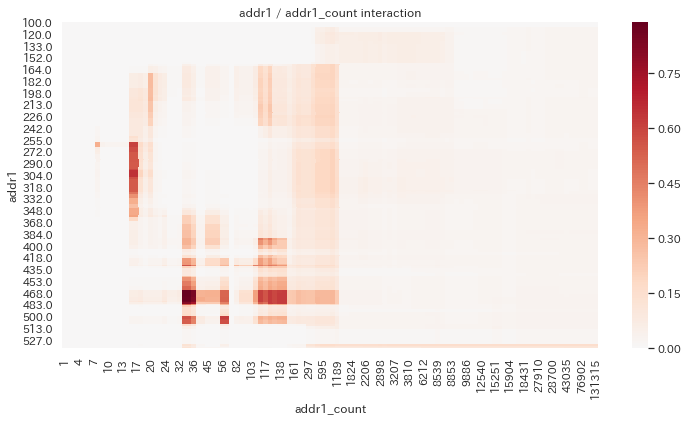

In [147]:
COL_NAME = 'addr1'
TARGET   = 'isFraud'

y = train[TARGET]
X = pd.DataFrame()
X[COL_NAME] = train[COL_NAME]
X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME]], ignore_index=True).value_counts(dropna=False))

result_df = pd.DataFrame()

for i in X[COL_NAME].sort_values().unique():
    x = pd.DataFrame()
    x[COL_NAME] = [i] * X[f'{COL_NAME}_count'].nunique()
    x[f'{COL_NAME}_count'] = X[f'{COL_NAME}_count'].sort_values().unique()
    
    result_df = pd.concat([result_df, x], axis=0)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

preds = clf.predict_proba(result_df)[:, 1]
preds = preds.reshape(X[COL_NAME].nunique(dropna=False), X[f'{COL_NAME}_count'].nunique(dropna=False))
preds = pd.DataFrame(preds, index=X[COL_NAME].sort_values().unique(), columns=X[f'{COL_NAME}_count'].sort_values().unique())

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.heatmap(preds, cmap='RdBu_r', center=0.0);
ax.set_ylabel(f'{COL_NAME}');
ax.set_xlabel(f'{COL_NAME}_count');
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction');

ROC AUC score: 0.6684040191046478


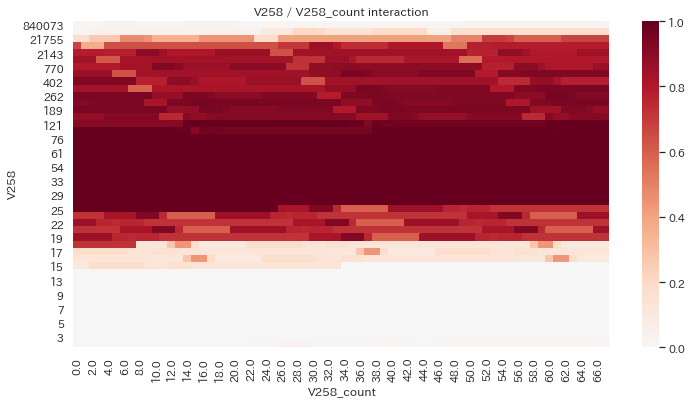

In [180]:
COL_NAME = 'V258'
TARGET   = 'isFraud'

y = train[TARGET]
X = pd.DataFrame()
X[COL_NAME] = train[COL_NAME]
X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME]], ignore_index=True).value_counts(dropna=False))

result_df = pd.DataFrame()

for i in X[COL_NAME].sort_values().unique():
    x = pd.DataFrame()
    x[COL_NAME] = [i] * X[f'{COL_NAME}_count'].nunique()
    x[f'{COL_NAME}_count'] = X[f'{COL_NAME}_count'].sort_values().unique()
    
    result_df = pd.concat([result_df, x], axis=0)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

preds = clf.predict_proba(result_df)[:, 1]
preds = preds.reshape(X[f'{COL_NAME}_count'].nunique(dropna=False), X[COL_NAME].nunique(dropna=False))
preds = pd.DataFrame(preds, index=X[f'{COL_NAME}_count'].sort_values(ascending=False).unique(), columns=X[COL_NAME].sort_values().unique())

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.heatmap(preds, cmap='RdBu_r', center=0.0);
ax.set_ylabel(f'{COL_NAME}');
ax.set_xlabel(f'{COL_NAME}_count');
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction');

ROC AUC score: 0.6260530995488596


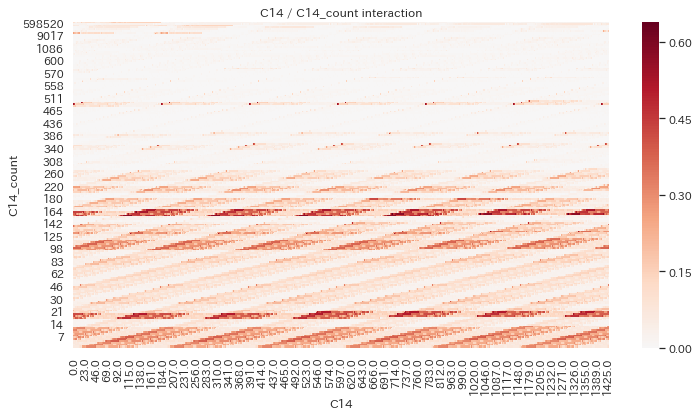

In [185]:
COL_NAME = 'C14'
TARGET   = 'isFraud'

y = train[TARGET]
X = pd.DataFrame()
X[COL_NAME] = train[COL_NAME]
X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME]], ignore_index=True).value_counts(dropna=False))

result_df = pd.DataFrame()

for i in X[COL_NAME].sort_values().unique():
    x = pd.DataFrame()
    x[COL_NAME] = [i] * X[f'{COL_NAME}_count'].nunique()
    x[f'{COL_NAME}_count'] = X[f'{COL_NAME}_count'].sort_values().unique()
    
    result_df = pd.concat([result_df, x], axis=0)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
clf = lgb.LGBMClassifier(**params)
clf.fit(X_train, y_train)
print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

preds = clf.predict_proba(result_df)[:, 1]
preds = preds.reshape(X[f'{COL_NAME}_count'].nunique(dropna=False), X[COL_NAME].nunique(dropna=False))
preds = pd.DataFrame(preds, index=X[f'{COL_NAME}_count'].sort_values(ascending=False).unique(), columns=X[COL_NAME].sort_values().unique())

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.heatmap(preds, cmap='RdBu_r', center=0.0);
ax.set_ylabel(f'{COL_NAME}_count');
ax.set_xlabel(f'{COL_NAME}');
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction');

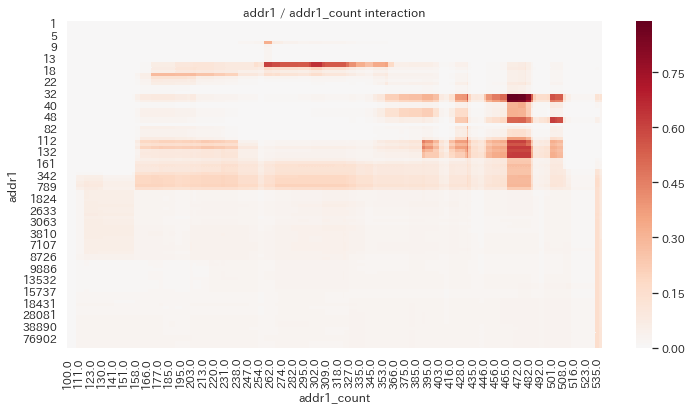

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.heatmap(preds.T, cmap='RdBu_r', center=0.0);
ax.set_ylabel(f'{COL_NAME}');
ax.set_xlabel(f'{COL_NAME}_count');
ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction');

In [151]:
t0['addr1']

0         315.0
1         325.0
2         330.0
3         476.0
4         420.0
5         272.0
6         126.0
7         325.0
8         337.0
9         204.0
10          NaN
11          NaN
12        204.0
13        330.0
14        226.0
15        315.0
16        170.0
17        204.0
18        184.0
19        264.0
20        299.0
21        204.0
22        299.0
23        126.0
24        264.0
25        441.0
26        472.0
27        337.0
28        251.0
29        204.0
          ...  
590509      NaN
590510    204.0
590511    110.0
590512    110.0
590513    315.0
590514    337.0
590515    472.0
590516    204.0
590517    110.0
590518    272.0
590519    264.0
590520    204.0
590521      NaN
590522    325.0
590523    299.0
590524    387.0
590525    310.0
590527    264.0
590528    299.0
590529      NaN
590530    299.0
590531    337.0
590532    231.0
590533    485.0
590534      NaN
590535    272.0
590536    204.0
590537    231.0
590538    387.0
590539    299.0
Name: addr1, Length: 569

In [154]:
vc = t0['addr1'].value_counts()

In [174]:
t0['addr1'].value_counts().index

Float64Index([299.0, 325.0, 204.0, 264.0, 330.0, 315.0, 441.0, 272.0, 123.0,
              184.0,
              ...
              219.0, 318.0, 316.0, 223.0, 462.0, 128.0, 481.0, 120.0, 227.0,
              340.0],
             dtype='float64', length=332)

In [175]:
heat = pd.DataFrame(
    {
        'idx': list(t0['addr1'].map(t0['addr1'].value_counts().index)),
        'cnt': t0['addr1'].map(t1['addr1'].value_counts())
    }
)

TypeError: 'Float64Index' object is not callable

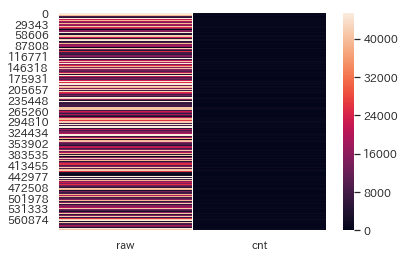

In [172]:
sns.heatmap(heat)

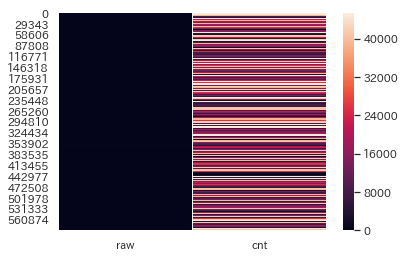

In [166]:
sns.heatmap(heat)

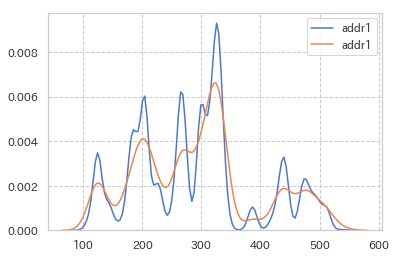

In [148]:
sns.kdeplot(t0['addr1'])
sns.kdeplot(t1['addr1'])

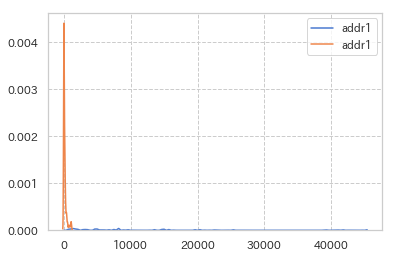

In [150]:
sns.kdeplot(t0['addr1'].value_counts())
sns.kdeplot(t1['addr1'].value_counts())

In [146]:
preds

,123,125,126,128,129,130,131,132,133,134,...,26532,27225,31511,31894,33411,41503,70496,80404,82537,91731
100.0,0.000517,0.000517,0.000517,0.000517,0.000517,0.000517,0.000517,0.000517,0.000517,0.000737,...,0.011763,0.011584,0.011584,0.011584,0.016037,0.016037,0.020108,0.020108,0.020108,0.021424
101.0,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000468,...,0.007497,0.007382,0.007382,0.007382,0.010237,0.010237,0.012854,0.012854,0.012854,0.013703
102.0,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000393,0.000468,...,0.007497,0.007382,0.007382,0.007382,0.010237,0.010237,0.012854,0.012854,0.012854,0.013703
103.0,0.000504,0.000504,0.000504,0.000504,0.000504,0.000504,0.000504,0.000504,0.000504,0.000808,...,0.024567,0.024156,0.024156,0.024156,0.033278,0.033278,0.022948,0.022948,0.022948,0.024834
104.0,0.003439,0.003439,0.003439,0.003439,0.003439,0.003439,0.003439,0.003439,0.003439,0.006255,...,0.024567,0.024156,0.024156,0.024156,0.033278,0.033278,0.022948,0.022948,0.022948,0.024834
105.0,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.001027,...,0.014811,0.014560,0.014560,0.014560,0.020134,0.020134,0.018753,0.018753,0.018753,0.020301
106.0,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.001027,...,0.014811,0.014560,0.014560,0.014560,0.020134,0.020134,0.018753,0.018753,0.018753,0.020301
108.0,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.000716,0.001027,...,0.014811,0.014560,0.014560,0.014560,0.020134,0.020134,0.018753,0.018753,0.018753,0.020301
109.0,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000570,...,0.014811,0.014560,0.014560,0.014560,0.020134,0.020134,0.018753,0.018753,0.018753,0.020301
110.0,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000411,0.000570,...,0.014811,0.014560,0.014560,0.014560,0.020134,0.020134,0.018753,0.018753,0.018753,0.020301


In [145]:
COL_NAME = 'COL_NAME'
TARGET   = 'isFraud'

def plot_count_interaction(train, COL_NAME, TARGET):
    y = train[TARGET]
    X = pd.DataFrame()
    X[COL_NAME] = train[COL_NAME]
    X[f'{COL_NAME}_count'] = train[COL_NAME].map(pd.concat([train[COL_NAME], test[COL_NAME]], ignore_index=True).value_counts(dropna=False))

    result_df = pd.DataFrame()

    for i in X[COL_NAME].sort_values().unique():
        x = pd.DataFrame()
        x[COL_NAME] = [i] * X[f'{COL_NAME}_count'].nunique()
        x[f'{COL_NAME}_count'] = X[f'{COL_NAME}_count'].sort_values().unique()

        result_df = pd.concat([result_df, x], axis=0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47, stratify=y)
    clf = lgb.LGBMClassifier(**params)
    clf.fit(X_train, y_train)
    print('ROC AUC score:', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

    preds = clf.predict_proba(result_df)[:, 1]
    preds = preds.reshape(X[COL_NAME].nunique(dropna=False), X[f'{COL_NAME}_count'].nunique(dropna=False))
    preds = pd.DataFrame(preds, index=X[COL_NAME].sort_values().unique(), columns=X[f'{COL_NAME}_count'].sort_values().unique())

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    sns.heatmap(preds, cmap='RdBu_r', center=0.0);
    ax.set_ylabel(f'{COL_NAME}');
    ax.set_xlabel(f'{COL_NAME}_count');
    ax.set_title(f'{COL_NAME} / {COL_NAME}_count interaction')
    plt.show()
    
    return

SyntaxError: positional argument follows keyword argument (<ipython-input-145-5d3615a29c89>, line 26)

ROC AUC score: 0.6457425578638812


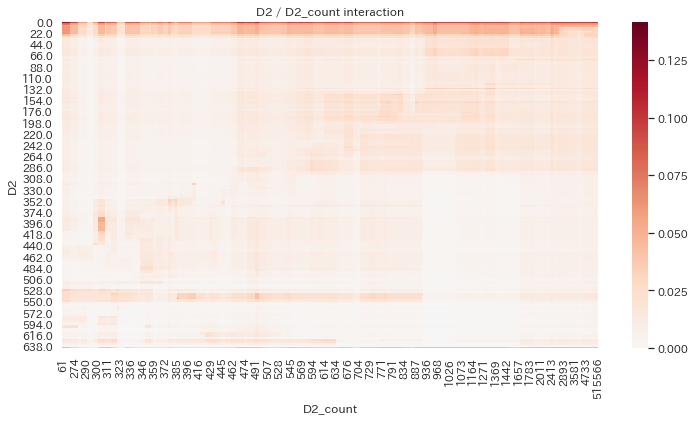

In [144]:
COL_NAME = 'D2'
plot_count_interaction(train, COL_NAME, TARGET)

In [143]:
train['D2'].nunique()

641

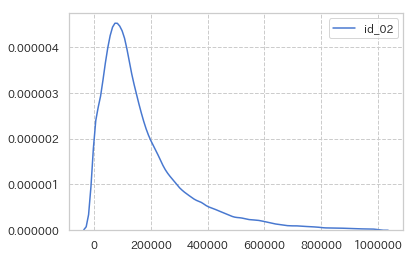

In [138]:
sns.kdeplot(train['id_02'])

In [141]:
t0 = train[train['isFraud'] == 0]
t1 = train[train['isFraud'] == 1]

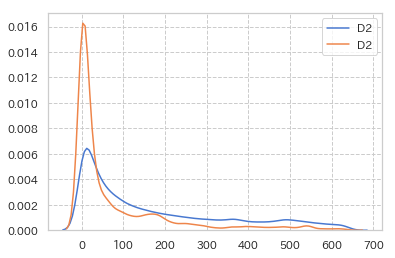

In [142]:
sns.kdeplot(t0['D2'])
sns.kdeplot(t1['D2'])

In [132]:
COL_NAME = 'id_02'
TARGET   = 'isFraud'

plot_count_interaction(train, COL_NAME, TARGET)

KeyboardInterrupt: 

In [109]:
x = x.reshape(x, (stepB, ))

TypeError: only integer scalar arrays can be converted to a scalar index

In [124]:
preds = df['pred'].values
preds = preds.reshape(df['card1'].nunique(dropna=False), df['card1_count'].nunique(dropna=False))
preds = pd.DataFramer(preds, index=df['card1'].sort_values().unique(dropna_false), columns=df['card1_count'].sort_values().unique(dropna=False))

ValueError: cannot reshape array of size 590540 into shape (13553,517)

In [125]:
13553*517

7006901

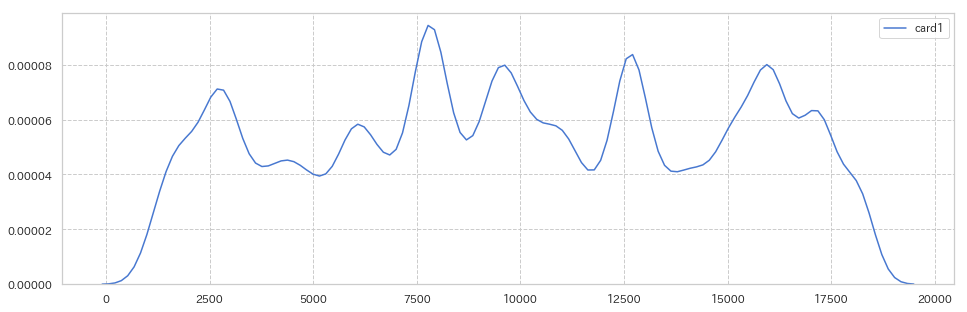

In [122]:
plt.figure(figsize=(16, 5))
sns.kdeplot(df['card1']);

In [104]:
x = df['pred'].values
x = np.reshape(x, (stepB, step))
x = np.flip(x, axis=0)

# PLOT LGBM PREDICTIONS USING MAGIC    
plt.subplot(1, 2, 1)
sns.heatmap(x, cmap='RdBu_r', center=0.0) 
plt.title('card1 Predictions with Magic', fontsize=16)    
plt.xticks(np.linspace(0, 49, 5), np.round(np.linspace(mn, mx, 5), 1))
plt.xlabel('car1')
s = min(mxFE-mnFE+1, 20)
plt.yticks(np.linspace(mnFE, mxFE, s)-0.5, np.linspace(mxFE, mnFE, s).astype('int'))
plt.ylabel('Count')
plt.show()

ValueError: cannot reshape array of size 590540 into shape (517,50)

In [ ]:
train2 = train.sample(frac=1,random_state=42)
evals_result = {}
num_vars = 200

# SAVE OUT-OF-FOLD PREDICTIONS
all_oof = np.zeros((len(train2),num_vars+1))
all_oof[:,0] = np.ones(len(train2))
all_oofB = np.zeros((len(train2),num_vars+1))
all_oofB[:,0] = np.ones(len(train2))

# SAVE TEST PREDICTIONS
all_preds = np.zeros((len(test),num_vars+1))
all_preds[:,0] = np.ones(len(test))
all_predsB = np.zeros((len(test),num_vars+1))
all_predsB[:,0] = np.ones(len(test))

for j in range(num_vars):
    # MODEL WITH MAGIC
    features = ['var_'+str(j),'var_'+str(j)+'_FE']
    oof = np.zeros(len(train2))
    preds = np.zeros(len(test))
    
    # PLOT DENSITIES    
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,2)
    sns.distplot(train2[train2['target']==0]['var_'+str(j)], label = 't=0')
    sns.distplot(train2[train2['target']==1]['var_'+str(j)], label = 't=1')
    plt.legend()
    plt.yticks([])
    plt.xlabel('Var_'+str(j))

    # MAKE A GRID OF POINTS FOR LGBM TO PREDICT    
    mn,mx = plt.xlim()
    mnFE = train2['var_'+str(j)+'_FE'].min()
    mxFE = train2['var_'+str(j)+'_FE'].max()
    step = 50
    stepB = train2['var_'+str(j)+'_FE'].nunique()
    w = (mx-mn)/step
    x = w * (np.arange(0,step)+0.5) + mn
    x2 = np.array([])
    for i in range(stepB):
        x2 = np.concatenate([x,x2])
    df = pd.DataFrame({'var_'+str(j):x2})
    df['var_'+str(j)+'_FE'] = mnFE + (mxFE-mnFE)/(stepB-1) * (df.index//step)
    df['pred'] = 0
    
    # 5-FOLD WITH MAGIC
    for k in range(5):
        valid = train2.iloc[k*40000:(k+1)*40000]
        train = train2[ ~train2.index.isin(valid.index) ]    
        trn_data  = lgb.Dataset(train[features], label=train['target'])
        val_data = lgb.Dataset(valid[features], label=valid['target'])     
        model = lgb.train(param, trn_data, 750, valid_sets = [trn_data, val_data], 
                verbose_eval=False, evals_result=evals_result)
        x = evals_result['valid_1']['auc']
        best = x.index(max(x))
        #print('i=',i,'k=',k,'best=',best)
        oof[k*40000:(k+1)*40000] = model.predict(valid[features], num_iteration=best)
        preds += model.predict(test[features], num_iteration=best)/5.0
        df['pred'] += model.predict(df[features], num_iteration=best)/5.0
            
    val_auc = roc_auc_score(train2['target'],oof)
    print('VAR_'+str(j)+' with magic val_auc =',round(val_auc,5))
    all_oof[:,j+1] = oof
    all_preds[:,j+1] = preds
    x = df['pred'].values
    x = np.reshape(x,(stepB,step))
    x = np.flip(x,axis=0)
    
    # PLOT LGBM PREDICTIONS USING MAGIC    
    plt.subplot(1,2,1)
    sns.heatmap(x, cmap='RdBu_r', center=0.0) 
    plt.title('VAR_'+str(j)+' Predictions with Magic',fontsize=16)    
    plt.xticks(np.linspace(0,49,5),np.round(np.linspace(mn,mx,5),1))
    plt.xlabel('Var_'+str(j))
    s = min(mxFE-mnFE+1,20)
    plt.yticks(np.linspace(mnFE,mxFE,s)-0.5,np.linspace(mxFE,mnFE,s).astype('int'))
    plt.ylabel('Count')
    plt.show()
    
    # MODEL WITHOUT MAGIC
    features = ['var_'+str(j)]
    oof = np.zeros(len(train2))
    preds = np.zeros(len(test))
    
    # PLOT DENSITIES
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,2)
    sns.distplot(train2[train2['target']==0]['var_'+str(j)], label = 't=0')
    sns.distplot(train2[train2['target']==1]['var_'+str(j)], label = 't=1')
    plt.legend()
    plt.yticks([])
    plt.xlabel('Var_'+str(j))
    
    # MAKE A GRID OF POINTS FOR LGBM TO PREDICT
    mn,mx = plt.xlim()
    mnFE = train2['var_'+str(j)+'_FE'].min()
    mxFE = train2['var_'+str(j)+'_FE'].max()
    step = 50
    stepB = train2['var_'+str(j)+'_FE'].nunique()
    w = (mx-mn)/step
    x = w * (np.arange(0,step)+0.5) + mn
    x2 = np.array([])
    for i in range(stepB):
        x2 = np.concatenate([x,x2])
    df = pd.DataFrame({'var_'+str(j):x2})
    df['var_'+str(j)+'_FE'] = mnFE + (mxFE-mnFE)/(stepB-1) * (df.index//step)
    df['pred'] = 0
    
    # 5-FOLD WITHOUT MAGIC
    for k in range(5):
            valid = train2.iloc[k*40000:(k+1)*40000]
            train = train2[ ~train2.index.isin(valid.index) ]
            trn_data  = lgb.Dataset(train[features], label=train['target'])
            val_data = lgb.Dataset(valid[features], label=valid['target'])     
            model = lgb.train(param, trn_data, 750, valid_sets = [trn_data, val_data], 
                    verbose_eval=False, evals_result=evals_result)      
            x = evals_result['valid_1']['auc']
            best = x.index(max(x))
            #print('i=',i,'k=',k,'best=',best)
            oof[k*40000:(k+1)*40000] = model.predict(valid[features], num_iteration=best)
            preds += model.predict(test[features], num_iteration=best)/5.0
            df['pred'] += model.predict(df[features], num_iteration=best)/5.0
            
    val_auc = roc_auc_score(train2['target'],oof)
    print('VAR_'+str(j)+' without magic val_auc =',round(val_auc,5))
    all_oofB[:,j+1] = oof
    all_predsB[:,j+1] = preds
    x = df['pred'].values
    x = np.reshape(x,(stepB,step))
    x = np.flip(x,axis=0)
    
    # PLOT LGBM PREDICTIONS WITHOUT USING MAGIC
    plt.subplot(1,2,1)
    sns.heatmap(x, cmap='RdBu_r', center=0.0) 
    plt.title('VAR_'+str(j)+' Predictions without Magic',fontsize=16)
    plt.xticks(np.linspace(0,49,5),np.round(np.linspace(mn,mx,5),1))
    plt.xlabel('Var_'+str(j))
    plt.yticks([])
    plt.ylabel('')
    plt.show()